## NLP PubMed Miner

### 4.1 Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 4.2 Loading Data

In [2]:
# Load the final co-occurrence matrix 
df = pd.read_csv("../Pubmed-NLP/data/cooccurrence_matrix_filtered.csv")

### 4.3 Barplot of Top Clinical Triplets

/var/folders/2q/n8zrvnsn6pqgprs9k6_lbtqc0000gn/T/ipykernel_58494/1676165274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Triplet", x="Count", data=df_top, palette="viridis")


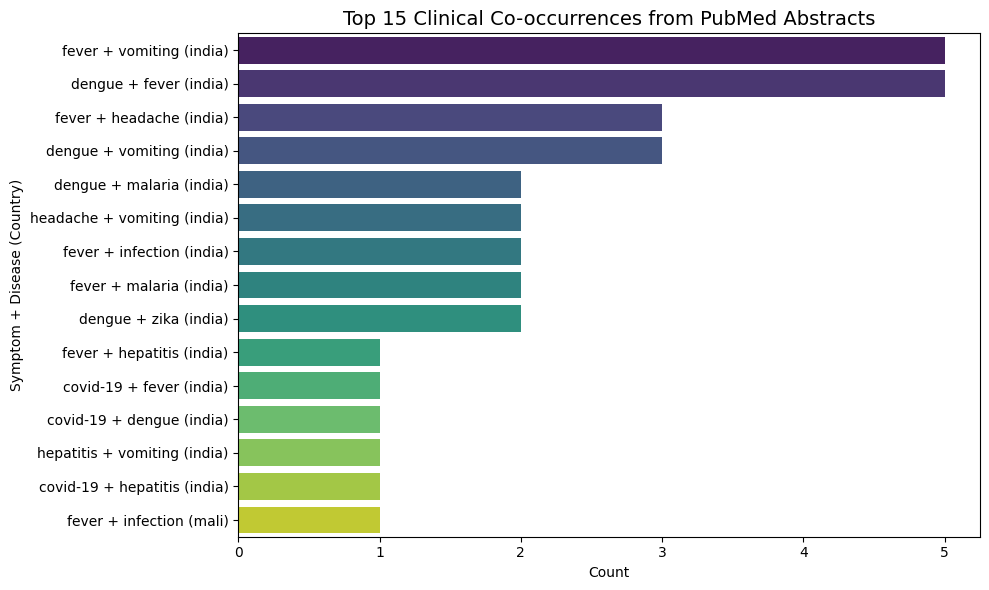

In [3]:
# Pick top 15 combinations
df_top = df.sort_values(by="Count", ascending=False).head(15)
df_top["Triplet"] = df_top["Symptom"] + " + " + df_top["Disease"] + " (" + df_top["Country"] + ")"

plt.figure(figsize=(10, 6))
sns.barplot(y="Triplet", x="Count", data=df_top, palette="viridis")
plt.title("Top 15 Clinical Co-occurrences from PubMed Abstracts", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Symptom + Disease (Country)")
plt.tight_layout()
plt.savefig("../Pubmed-NLP/output/Barplot_of_Top_Clinical_Triplets.png")
plt.show()

### 4.4 Heatmap of Symptom × Country

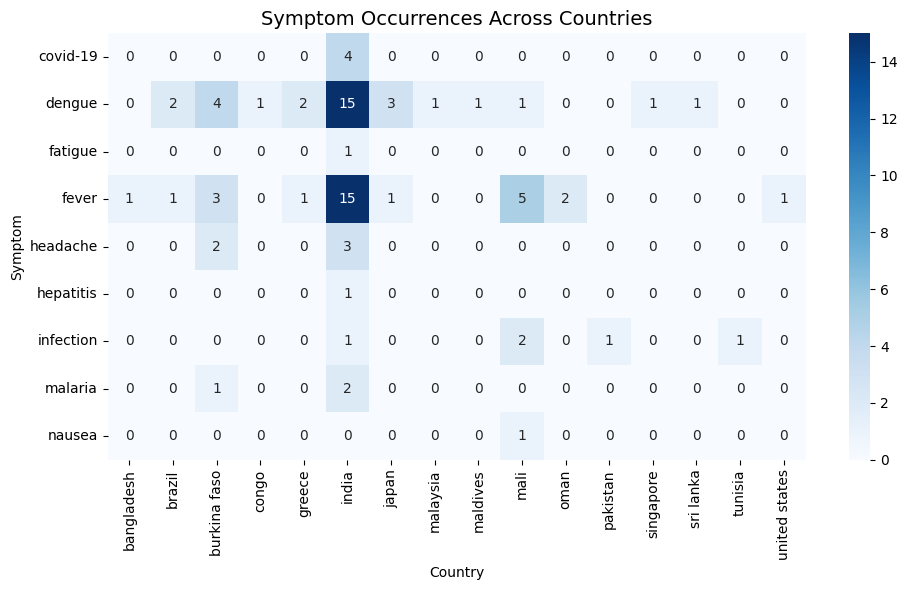

In [4]:
heatmap_df = df.pivot_table(index="Symptom", columns="Country", values="Count", aggfunc="sum", fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, cmap="Blues", annot=True, fmt="d")
plt.title("Symptom Occurrences Across Countries", fontsize=14)
plt.ylabel("Symptom")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig("../Pubmed-NLP/output/heatmap_symptom_country.png")
plt.show()

### 4.5 Add Threat Index Column

In [5]:
max_count = df["Count"].max()
df["ThreatIndex"] = df["Count"] / max_count

### 4.6 Save Output

In [6]:
# Save for dashboard or final report
df.to_csv("../Pubmed-NLP/data/cooccurrence_matrix_with_threat_index.csv", index=False)

### 4.7 Preview top Threat Index triplets

In [7]:
df.sort_values(by="ThreatIndex", ascending=False).head(10)

,Symptom,Disease,Country,Count,ThreatIndex
0,fever,vomiting,india,5,1.0
1,dengue,fever,india,5,1.0
2,fever,headache,india,3,0.6
3,dengue,vomiting,india,3,0.6
4,dengue,malaria,india,2,0.4
5,headache,vomiting,india,2,0.4
6,fever,infection,india,2,0.4
7,fever,malaria,india,2,0.4
8,dengue,zika,india,2,0.4
44,fever,hepatitis,india,1,0.2
